# Exercise Sheet 5

### Exercise 1

Intuition:
There is  a simple way of smoothing the max-function. For instance, if we have two smooth functions $f1(x)$ and $f2(x)$ the pointwise maximum $f(x) =max(f1(x),f2(x))$ might not be smooth.Think for instance of $|x|=max(−x,x)$ which is not smooth at $x=0$.
The following function $$smoothmax(f1(x),f2(x)) =(1/M)log(exp(M·f1(x))+exp(M·f2(x)))$$ for a parameter $M>0$ which controls how much to soften the max.

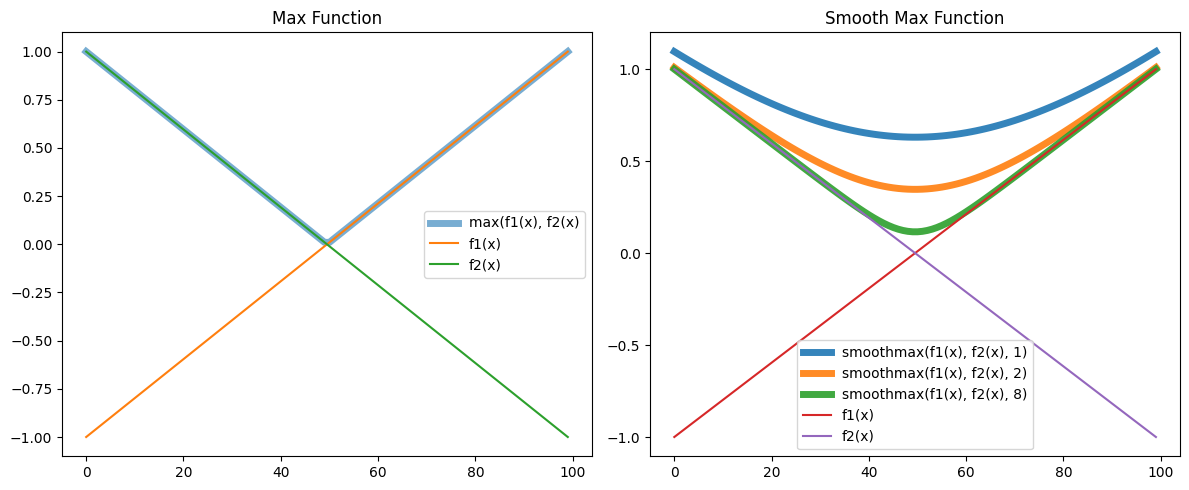

In [34]:
import numpy as np
import matplotlib.pyplot as plt
x_1 = np.linspace(-1, 1, 100)
x_2 = x_1 * -1
def smooth_max(x1, x2, M: float = 0.1):
    """
    Smooth version of point wise max of two functions
    :param x1:
    :param x2:
    :param M: smoothing factor
    :return:
    """
    assert M > 0, "M has to be larger than 0"
    return (1/M) * np.log(np.exp(M*x1)+np.exp(M*x2))

fig, (max_ax, smooth_max_ax) = plt.subplots(ncols=2, sharex="col")
fig.set_size_inches(12, 5)
max_ax.set_title("Max Function")
max_ax.plot(np.max((x_1, x_2), axis=0), label="max(f1(x), f2(x)", linewidth=5, alpha =0.6)
max_ax.plot(x_1, label="f1(x)")
max_ax.plot(x_2, label="f2(x)")
max_ax.legend()

smooth_max_ax.set_title("Smooth Max Function")
smooth_max_ax.plot(smooth_max(x_1, x_2, 1.1), label="smoothmax(f1(x), f2(x), 1)", linewidth=5, alpha =0.9)
smooth_max_ax.plot(smooth_max(x_1, x_2, 2), label="smoothmax(f1(x), f2(x), 2)", linewidth=5, alpha =0.9)
smooth_max_ax.plot(smooth_max(x_1, x_2, 6), label="smoothmax(f1(x), f2(x), 8)", linewidth=5, alpha =0.9)
smooth_max_ax.plot(x_1, label="f1(x)")
smooth_max_ax.plot(x_2, label="f2(x)")
smooth_max_ax.legend()

fig.tight_layout()
plt.show()

Intuition:
Show that the following inequality $$max(a,b)≤smoothmax(a,b)≤max(a,b)+1Mlog(2)$$ holds.


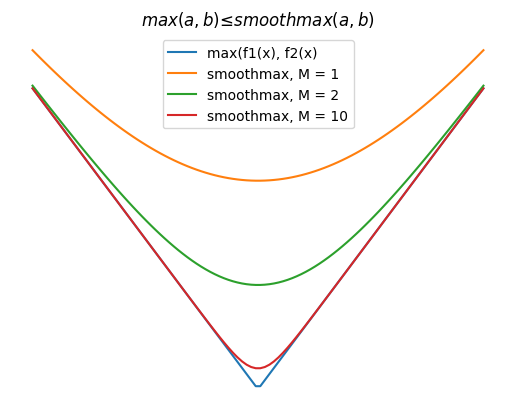

In [46]:
plt.title("$max(a,b)≤smoothmax(a,b)$")
plt.plot(np.max((x_1, x_2), axis=0), label="max(f1(x), f2(x)")
plt.plot(smooth_max(x_1, x_2, 1), label="smoothmax, M = 1")
plt.plot(smooth_max(x_1, x_2, 2), label="smoothmax, M = 2")
plt.plot(smooth_max(x_1, x_2, 10), label="smoothmax, M = 10")
plt.axis("off")
plt.legend()
plt.show()

Max function is less than or equal to smoothmax:

The plot shows that with larger values for M the smoothmax function converges to the max function. To prove that smoothmax converges to the max for maximum values one can look at the two cases $a≥b$ and $b>a$ for M approaching infinity.

Case 1: a≥b:
In this case, $exp(M⋅a)$ dominates, and as M approaches infinity, $exp(M⋅a)$ dominates $exp(M⋅b)$.
Thus, $exp(M⋅a)+exp(M⋅b)$ approaches $exp(M⋅a)$.
Taking the logarithm and scaling by $1/M$, we have:
$1/M*log(exp(M⋅a)+exp(M⋅b))→1/M⋅(M⋅a)=a$
Therefore, $smoothmax(a,b)$ approaches  $a$ as $M$ approaches infinity when $a≥b$.

Case 1: b>a:
In this case, $exp(M⋅b)$ dominates, and as M approaches infinity, $exp(M⋅b)$ dominates $exp(M⋅a)$.
Thus, $exp(M⋅a)+exp(M⋅b)$ approaches $exp(M⋅b)$.
Taking the logarithm and scaling by $1/M$, we have:
$1/M*log(exp(M⋅a)+exp(M⋅b))→1/M⋅(M⋅b)=b$
Therefore, $smoothmax(a,b)$ approaches  $b$ as $M$ approaches infinity when $b>a$.

$max(a,b)≤smoothmax(a,b)$ is thereby true because $smoothmax(a,b)$  is essentially constructed using the maximum function within the logarithm. Thus, it can never output a value less than the maximum of $a$ and $b$.

smoothmax is less than or equal to max plus a constant term::

$smoothmax(a,b)≤max(a,b)+1/M*log(2)$

To prove this, let's rewrite the smoothmax function:

$smoothmax(a,b)= 1/M * log(exp(M⋅a)+exp(M⋅b))$

We'll denote $max(a,b)$ as $c$.

Using the properties of logarithms, we know that:

$exp(M⋅c)=exp(M⋅max(a,b))=max(exp(M⋅a),exp(M⋅b))$

Now, we can use the fact that $max(x,y)≤x+y$ for all $x,y$ to get:

$exp(M⋅c)≤exp(M⋅a)+exp(M⋅b)$

Taking the logarithm of both sides and dividing by MM, we get:

$c≤1/M*log(exp(M⋅a)+exp(M⋅b))$

Hence,

$smoothmax(a,b)≤max(a,b)+1/M*log(2)$

Relation between smoothmax and logistic regression vs. SVMs:

Smoothmax = smooth approximation of the max function. This property makes it particularly useful in contexts where you want to replace a non-smooth objective function (like the max function in SVMs) with a smooth one.

Logistic regression and Support Vector Machines (SVMs) are both used for classification tasks, but they optimize different objective functions. Logistic regression minimizes the logistic loss function, which is smooth, while SVMs minimize the hinge loss function, which is not smooth due to the presence of the max function.

By replacing the max function in the hinge loss with smoothmax, we can obtain a smooth approximation of the SVM objective function. This smoothness property can have implications for optimization algorithms used to train the model. It might make optimization easier or more stable in certain cases, especially when using gradient-based methods.

### Exercise 2

Your task is to find a linear classifier to classify images of handwritten digits. The data set contains two digits, 1 and 5. The following figures show four samples of each number.You will find the training and the test data set dataset_numbers_train.npy and dataset_numbers_test.npy.If yi=0 then the i-th image represents a one, otherwise yi=1 represents a five. What is your best test error?

In [49]:

def load_data(name, m=None):
    data = np.load(name)
    x = data[:,:-1]
    y = data[:,-1]

    return (x, y)

def plot_numbers(numb, tag, rng=None):
    if rng is None:
        rng = np.random.default_rng(seed=66)
    ones = numb[tag == 0]
    fives = numb[tag == 1]

    (fig, axs) = plt.subplots(nrows=2, ncols=4)

    indx = rng.integers(len(ones), size=4)
    for (ax,i) in zip(axs[0], indx):
        ax.imshow(ones[i].reshape(28,28), cmap='gray', vmin=0, vmax=1)

    indx = rng.integers(len(fives), size=4)
    for (ax,i) in zip(axs[1], indx):
        ax.imshow(fives[i].reshape(28,28), cmap='gray', vmin=0, vmax=1)

    plt.show()

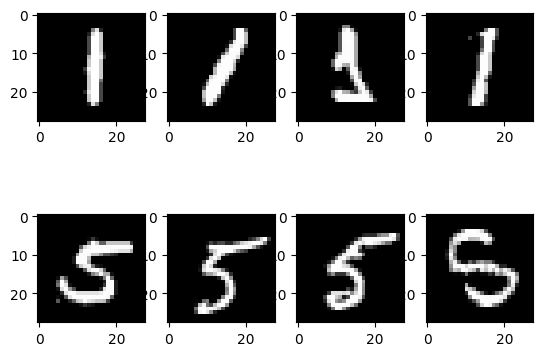

In [51]:
x_train, y_train = load_data('dataset_numbers_train.npy')
x_test, y_test = load_data('dataset_numbers_test.npy')
plot_numbers(x_train, y_train)

In [57]:
x_train.shape, y_train.shape

((12163, 784), (12163,))

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are your training and test data
# Instantiate logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(x_train, y_train)

# Make predictions on the training and test data
train_preds = logreg.predict(x_train)
test_preds = logreg.predict(x_test)

# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Training accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")


Training accuracy: 0.9995067006495109
Test accuracy: 0.9965466206216083
